<a href="https://colab.research.google.com/github/alamjane/Randstad/blob/main/WHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
 
from google.colab import files
uploaded = files.upload()

Saving WHO.csv to WHO (18).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['WHO.csv']))

df.head()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),Population living below the poverty line (% living on &lt; US$1 per day),Population median age (years),Population proportion over 60 (%),Population proportion under 15 (%),Registration coverage of births (%),Total fertility rate (per woman),Antenatal care coverage - at least four visits (%),Antiretroviral therapy coverage among HIV-infected pregt women for PMTCT (%),Antiretroviral therapy coverage among people with advanced HIV infections (%),Births attended by skilled health personnel (%),Births by caesarean section (%),Children aged 6-59 months who received vitamin A supplementation (%),Children aged &lt;5 years sleeping under insecticide-treated nets (%),Children aged &lt;5 years who received any antimalarial treatment for fever (%),Children aged &lt;5 years with ARI symptoms taken to facility (%),Children aged &lt;5 years with diarrhoea receiving ORT (%),Contraceptive prevalence (%),Neonates protected at birth against neonatal tetanus (PAB) (%),One-year-olds immunized with MCV,One-year-olds immunized with three doses of diphtheria tetanus toxoid and pertussis (DTP3) (%),One-year-olds immunized with three doses of Hepatitis B (HepB3) (%),One-year-olds immunized with three doses of Hib (Hib3) vaccine (%),Tuberculosis detection rate under DOTS (%),Tuberculosis treatment success under DOTS (%),Women who have had mammography (%),Women who have had PAP smear (%),Community and traditional health workers density (per 10 000 population),Dentistry personnel density (per 10 000 population),Environment and public health workers density (per 10 000 population),...,Population_in_urban_agglomerations_more_than_1_million,Population_total,Poverty_headcount_ratio_at_national_poverty_line,Present_value_of_debt,Primary_completion_rate_total,Primary_energy_consumption,Primary_energy_consumption_per_person,Primary_school_completion_pct_of_boys,Primary_school_completion_pct_of_girls,Prostate_cancer_deaths_per_100_000_men,Prostate_cancer_new_cases_per_100_000_men,Prostate_cancer_number_of_male_deaths,Prostate_cancer_number_of_new_male_cases,Pump_price_for_gasoline,Ratio_of_girls_to_boys_in_primary_and_secondary_education,Ratio_of_young_literate_females_to_males,Roads_paved,SO2_emissions_per_person,Services_contribution_to_economy,Stomach_cancer_deaths_per_100_000_men,Stomach_cancer_deaths_per_100_000_women,Stomach_cancer_new_cases_per_100_000_men,Stomach_cancer_new_cases_per_100_000_women,Stomach_cancer_number_of_female_deaths,Stomach_cancer_number_of_male_deaths,Stomach_cancer_number_of_new_female_cases,Stomach_cancer_number_of_new_male_cases,Sugar_per_person,Surface_area,Tax_revenue,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,23.0,NaN,16.0,4.0,47.0,6.0,7.2,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,73.0,70.0,83.0,83.0,NaN,66.0,90.0,NaN,NaN,NaN,NaN,NaN,...,NaN,29900000.0,NaN,NaN,37.73,NaN,NaN,NaN,NaN,2.80,4.5,151.0,249.0,0.68,55.57,36.20,23.66,3.14,39.42,15.80,8.30,18.5,9.7,499.0,936.0,592.0,1108.0,NaN,652090.0,NaN,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,2.0,29.0,13.0,26.0,90.0,2.1,NaN,NaN,NaN,100.0,15.0,NaN,NaN,NaN,NaN,NaN,75.1,87.0,97.0,98.0,98.0,NaN,37.0,77.0,NaN,NaN,NaN,3.0,NaN,...,NaN,3563112.0,25.4,NaN,96.34,NaN,NaN,99.0,99.0,8.39,15.1,109.0,194.0,1.44,97.02,100.13,39.00,1.15,55.70,13.86,6.65,16.5,6.9,92.0,180.0,103.0,226.0,65.75,28750.0,17.29,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Columns: 358 entries, Country to Urban_population_pct_of_total
dtypes: float64(355), int64(2), object(1)
memory usage: 565.1+ KB


In [ ]:
#checking duplicates
sum(df.duplicated(subset = 'Country')) == 0
# No duplicate values

True

In [ ]:
df.shape # checking rows and columns

(202, 358)

In [ ]:
df.describe() # summary of dataset

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),Population living below the poverty line (% living on &lt; US$1 per day),Population median age (years),Population proportion over 60 (%),Population proportion under 15 (%),Registration coverage of births (%),Total fertility rate (per woman),Antenatal care coverage - at least four visits (%),Antiretroviral therapy coverage among HIV-infected pregt women for PMTCT (%),Antiretroviral therapy coverage among people with advanced HIV infections (%),Births attended by skilled health personnel (%),Births by caesarean section (%),Children aged 6-59 months who received vitamin A supplementation (%),Children aged &lt;5 years sleeping under insecticide-treated nets (%),Children aged &lt;5 years who received any antimalarial treatment for fever (%),Children aged &lt;5 years with ARI symptoms taken to facility (%),Children aged &lt;5 years with diarrhoea receiving ORT (%),Contraceptive prevalence (%),Neonates protected at birth against neonatal tetanus (PAB) (%),One-year-olds immunized with MCV,One-year-olds immunized with three doses of diphtheria tetanus toxoid and pertussis (DTP3) (%),One-year-olds immunized with three doses of Hepatitis B (HepB3) (%),One-year-olds immunized with three doses of Hib (Hib3) vaccine (%),Tuberculosis detection rate under DOTS (%),Tuberculosis treatment success under DOTS (%),Women who have had mammography (%),Women who have had PAP smear (%),Community and traditional health workers density (per 10 000 population),Dentistry personnel density (per 10 000 population),Environment and public health workers density (per 10 000 population),External resources for health as percentage of total expenditure on health,...,Population_in_urban_agglomerations_more_than_1_million,Population_total,Poverty_headcount_ratio_at_national_poverty_line,Present_value_of_debt,Primary_completion_rate_total,Primary_energy_consumption,Primary_energy_consumption_per_person,Primary_school_completion_pct_of_boys,Primary_school_completion_pct_of_girls,Prostate_cancer_deaths_per_100_000_men,Prostate_cancer_new_cases_per_100_000_men,Prostate_cancer_number_of_male_deaths,Prostate_cancer_number_of_new_male_cases,Pump_price_for_gasoline,Ratio_of_girls_to_boys_in_primary_and_secondary_education,Ratio_of_young_literate_females_to_males,Roads_paved,SO2_emissions_per_person,Services_contribution_to_economy,Stomach_cancer_deaths_per_100_000_men,Stomach_cancer_deaths_per_100_000_women,Stomach_cancer_new_cases_per_100_000_men,Stomach_cancer_new_cases_per_100_000_women,Stomach_cancer_number_of_female_deaths,Stomach_cancer_number_of_male_deaths,Stomach_cancer_number_of_new_female_cases,Stomach_cancer_number_of_new_male_cases,Sugar_per_person,Surface_area,Tax_revenue,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
count,202.000000,202.000000,177.000000,131.000000,178.000000,179.000000,179.000000,1.930000e+02,193.000000,193.000000,72.000000,179.000000,193.000000,193.000000,163.000000,192.000000,85.000000,36.000000,103.000000,181.000000,77.000000,25.000000,46.000000,50.000000,36.000000,37.000000,108.000000,104.000000,193.000000,193.000000,171.000000,114.000000,187.000000,177.000000,73.000000,72.000000,31.000000,114.000000,21.000000,191.000000,...,104.000000,1.740000e+02,87.000000,0.0,172.000000,65.000000,64.000000,147.000000,147.000000,172.000000,172.000000,171.000000,171.000000,169.000000,181.000000,132.000000,180.000000,140.000000,176.000000,172.000000,172.000000,172.000000,172.000000,171.000000,171.000000,171.000000,171.000000,173.000000,1.880000e+02,137.00

In [ ]:
df.isnull().sum() #  checking missing values

Country                            0
CountryID                          0
Continent                          0
Adolescent fertility rate (%)     25
Adult literacy rate (%)           71
                                  ..
Under_five_mortality_from_IHME    32
Under_five_mortality_rate         21
Urban_population                  14
Urban_population_growth           14
Urban_population_pct_of_total     14
Length: 358, dtype: int64

In [ ]:
df1 = df.fillna(0) # fill nan values with zeros

In [ ]:
df1.head()

,Country,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),Population living below the poverty line (% living on &lt; US$1 per day),Population median age (years),Population proportion over 60 (%),Population proportion under 15 (%),Registration coverage of births (%),Total fertility rate (per woman),Antenatal care coverage - at least four visits (%),Antiretroviral therapy coverage among HIV-infected pregt women for PMTCT (%),Antiretroviral therapy coverage among people with advanced HIV infections (%),Births attended by skilled health personnel (%),Births by caesarean section (%),Children aged 6-59 months who received vitamin A supplementation (%),Children aged &lt;5 years sleeping under insecticide-treated nets (%),Children aged &lt;5 years who received any antimalarial treatment for fever (%),Children aged &lt;5 years with ARI symptoms taken to facility (%),Children aged &lt;5 years with diarrhoea receiving ORT (%),Contraceptive prevalence (%),Neonates protected at birth against neonatal tetanus (PAB) (%),One-year-olds immunized with MCV,One-year-olds immunized with three doses of diphtheria tetanus toxoid and pertussis (DTP3) (%),One-year-olds immunized with three doses of Hepatitis B (HepB3) (%),One-year-olds immunized with three doses of Hib (Hib3) vaccine (%),Tuberculosis detection rate under DOTS (%),Tuberculosis treatment success under DOTS (%),Women who have had mammography (%),Women who have had PAP smear (%),Community and traditional health workers density (per 10 000 population),Dentistry personnel density (per 10 000 population),Environment and public health workers density (per 10 000 population),...,Population_in_urban_agglomerations_more_than_1_million,Population_total,Poverty_headcount_ratio_at_national_poverty_line,Present_value_of_debt,Primary_completion_rate_total,Primary_energy_consumption,Primary_energy_consumption_per_person,Primary_school_completion_pct_of_boys,Primary_school_completion_pct_of_girls,Prostate_cancer_deaths_per_100_000_men,Prostate_cancer_new_cases_per_100_000_men,Prostate_cancer_number_of_male_deaths,Prostate_cancer_number_of_new_male_cases,Pump_price_for_gasoline,Ratio_of_girls_to_boys_in_primary_and_secondary_education,Ratio_of_young_literate_females_to_males,Roads_paved,SO2_emissions_per_person,Services_contribution_to_economy,Stomach_cancer_deaths_per_100_000_men,Stomach_cancer_deaths_per_100_000_women,Stomach_cancer_new_cases_per_100_000_men,Stomach_cancer_new_cases_per_100_000_women,Stomach_cancer_number_of_female_deaths,Stomach_cancer_number_of_male_deaths,Stomach_cancer_number_of_new_female_cases,Stomach_cancer_number_of_new_male_cases,Sugar_per_person,Surface_area,Tax_revenue,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
0,Afghanistan,1,1,151.0,28.0,0.0,0.0,0.0,26088.0,4.0,23.0,0.0,16.0,4.0,47.0,6.0,7.2,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,10.3,73.0,70.0,83.0,83.0,0.0,66.0,90.0,0.0,0.0,0.0,0.0,0.0,...,0.00,29900000.0,0.0,0.0,37.73,0.00,0.00,0.0,0.0,2.80,4.5,151.0,249.0,0.68,55.57,36.20,23.66,3.14,39.42,15.80,8.30,18.5,9.7,499.0,936.0,592.0,1108.0,0.00,652090.0,0.00,692.50,0.000000e+00,0.00,0.000000e+00,257.00,231.9,257.00,5740436.0,5.44,22.9
1,Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,2.0,29.0,13.0,26.0,90.0,2.1,0.0,0.0,0.0,100.0,15.0,0.0,0.0,0.0,0.0,0.0,75.1,87.0,97.0,98.0,98.0,0.0,37.0,77.0,0.0,0.0,0.0,3.0,0.0,...,0.00,3563112.0,25.4,0.0,96.34,0.00,0.00,99.0,99.0,8.39,15.1,109.0,194.0,1.44,97.02,100.13,39.00,1.15,55.70,13.86,6.65,16.5,6.9,92.0,180.0,103.0,226.0,65.75,28750.0,17.29,3499.12,4.790000e+09,78.14,-2.0

In [ ]:
# Drop useless variables
df1 = df1.drop(['Country'], axis = 1)

In [ ]:
from sklearn.cluster import KMeans  # solving by Kmeans cluters
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df1) 
    wcss.append(kmeans.inertia_)

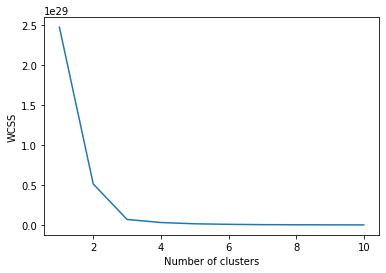

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, 11), wcss)  # To find how many cluster can we make
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)  # taking 3 clusters
Kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Kmean.cluster_centers_

array([[1.01319797e+02, 3.54314721e+00, 5.28020305e+01, ...,
        1.43879890e+07, 2.01583756e+00, 5.12116751e+01],
       [1.15500000e+02, 4.75000000e+00, 1.70000000e+01, ...,
        4.78000000e+07, 1.53250000e+00, 5.99750000e+01],
       [8.10000000e+01, 6.00000000e+00, 5.40000000e+01, ...,
        1.06000000e+08, 3.93000000e+00, 4.81000000e+01]])

In [ ]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0], dtype=int32)

In [ ]:
y_predict= kmeans.fit_predict(df1)  
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 6, 9, 6, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9, 1, 2, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 6, 7,
       0, 0, 0, 0], dtype=int32)